<a href="https://colab.research.google.com/github/tushiroda/CS370/blob/main/assignments/assignment1a/Assignment_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
  print(torch.cuda.current_device())
  print(torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))

device

device(type='cpu')

(np.float64(-4.048881208896637),
 np.float64(4.6659872174263),
 np.float64(-4.471621334552765),
 np.float64(4.243247091770172))

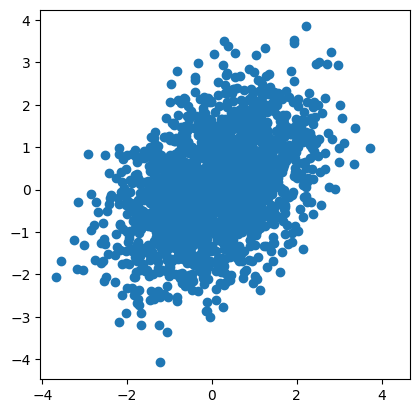

In [2]:
# Simulation of Mulitvariate Normal Distribution
Amean = torch.tensor([-0.5, -0.5])
Amatrix = torch.tensor([[1, 0.25], [0.25, 1]])
A = torch.distributions.multivariate_normal.MultivariateNormal(Amean, Amatrix)

Bmean = torch.tensor([0.5, 0.5])
Bmatrix = torch.tensor([[1, 0.25], [0.25, 1]])
B = torch.distributions.multivariate_normal.MultivariateNormal(Bmean, Bmatrix)

x = []
for _ in range(999):
  x.append(A.sample())
  x.append(B.sample())

x = torch.stack(x)

plt.scatter(*x.T)
plt.axis('square')

In [3]:
# K-means clustering
data = pd.DataFrame(x.numpy())
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [4]:
def random_centroids(data, k):
  centroids = []
  for _ in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [5]:
centroids = random_centroids(data, 10)

/tmp/ipykernel_2393/2311420827.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [6]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [7]:
labels = get_labels(data, centroids)
labels.value_counts()

4    485
6    314
9    303
5    154
1    151
2    145
3    144
7    136
8    104
0     62
Name: count, dtype: int64

In [8]:
def new_centroids(data, labels):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [10]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [11]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

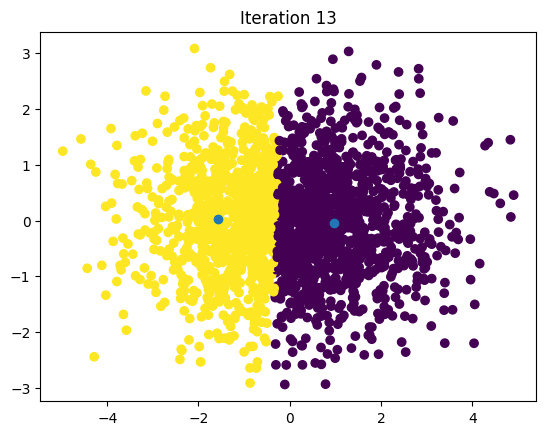

In [36]:
max_iterations = 100
k = 2

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1

In [37]:
# Projection with Principle Components Analysis (PCA)
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [38]:
X = X - np.mean(X, axis=0)

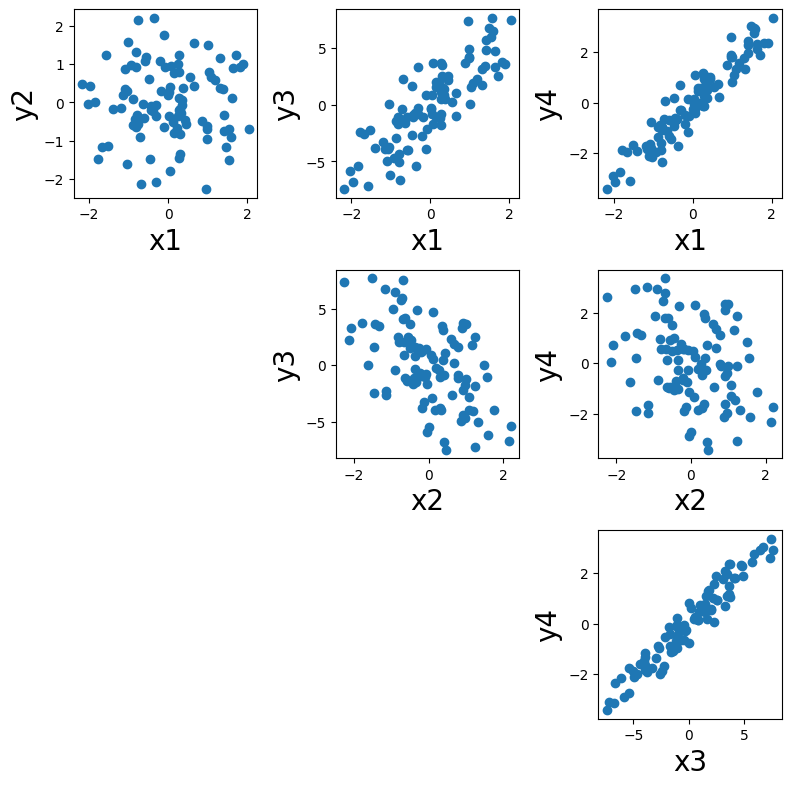

In [48]:
plt.figure(figsize=(10, 10))
for i in range(4):
  for j in range(4):
    if j > i:
      plt.subplot(4,4,i*4+j+1)
      plt.scatter(X[:,i], X[:,j])
      plt.xlabel(f'x{i+1}', fontsize=20)
      plt.ylabel(f'y{j+1}', fontsize=20)
plt.tight_layout()

In [49]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [50]:
# get components
principal_comps_builtin = pca.components_.T

In [51]:
for i,component in enumerate(pca.components_):
  print(f'principle component {i}')
  print(component)
  print()

principle component 0
[ 0.21770108 -0.11870185  0.88809454  0.38704548]

principle component 1
[ 0.48422995  0.80032772 -0.15104275  0.31966073]

principle component 2
[-0.17109623 -0.30949196 -0.37322315  0.85769767]

principle component 3
[ 0.82997209 -0.49959998 -0.22176263 -0.11120938]



In [52]:
cov_matrix = sum([X[i].reshape(-1, 1) @ X[i].reshape(1, -1) for i in range(100)]) / 100

In [53]:
eigvecs = np.linalg.eig(cov_matrix)

In [54]:
ordering = np.argsort(eigvecs[0])[::-1]

In [55]:
principal_comps_byhand = eigvecs[1][:,ordering]

In [56]:
print(principal_comps_byhand.T)

[[ 0.21770108 -0.11870185  0.88809454  0.38704548]
 [ 0.48422995  0.80032772 -0.15104275  0.31966073]
 [-0.17109623 -0.30949196 -0.37322315  0.85769767]
 [ 0.82997209 -0.49959998 -0.22176263 -0.11120938]]
